In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [3]:
def Coeff2(x, power):
    '''Prints intercept and coeff in a better format
    
    Paramaters:
    ------------
    x : name of model
    power: int,  degree of polynomial function
    
    Returns: Coefficients table'''
    
    coef_df=pd.DataFrame()
    coef_df=coef_df.append({"Name":'Intercept', 'Value':x.intercept_}, ignore_index=True)
    coef_df=coef_df.append({'Name':'Power_1','Value':x.coef_[0]}, ignore_index=True)
    
    if power > 1:
        for power in range(2, power+1):
            name= 'Power_' + str(power)
            coef_df=coef_df.append({"Name":name, 'Value':'{:.3e}'.format(x.coef_[power-1])}, ignore_index=True)
    
    return coef_df

# write polynomial dataframe function

In [4]:
def poly_df(feature, degree):
    '''Takes array with feature column and (int)degree.
    Returns DataFrame with Target as first col followed by features'''
    # degree >=1
    
    poly_df=pd.DataFrame()
    poly_df['price']=sales['price']
    poly_df['power_1']=feature
    
    #cehck if degree >1
    if degree > 1:
        for power in range(2, degree+1): #loop over reaming deg
            name = 'power_'+str(power)
            poly_df[name]=poly_df['power_1'].apply(lambda x: x**power)
            
    return poly_df
            

# import datasets


In [5]:
sales= pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales= sales.sort_values(by=['sqft_living','price'])

In [6]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0.0,0.00,290.0,20875,1,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620.0,22850.0
15381,2856101479,20140701T000000,276000.0,1.0,0.75,370.0,1801,1,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340.0,5000.0
860,1723049033,20140620T000000,245000.0,1.0,0.75,380.0,15000,1,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170.0,15000.0
18379,1222029077,20141029T000000,265000.0,0.0,0.75,384.0,213444,1,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920.0,224341.0
4868,6896300380,20141002T000000,228000.0,0.0,1.00,390.0,5900,1,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170.0,6000.0


In [7]:
sales.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Predict price with polynomial of 1st deg

In [8]:
poly1_data= poly_df(sales['sqft_living'],degree=1)


In [9]:
poly1_data.head()

,price,power_1
19452,142000.0,290.0
15381,276000.0,370.0
860,245000.0,380.0
18379,265000.0,384.0
4868,228000.0,390.0


In [12]:
X=poly1_data['power_1'].reshape(-1,1)
y=poly1_data['price']

model1=LinearRegression().fit(X,y)
pred1=model1.predict(X)

#weights
Coeff2(model1, 1)

,Name,Value
0,Intercept,-43580.743094
1,Power_1,280.623568


In [13]:
# scatter plot

<IPython.core.display.Javascript object>


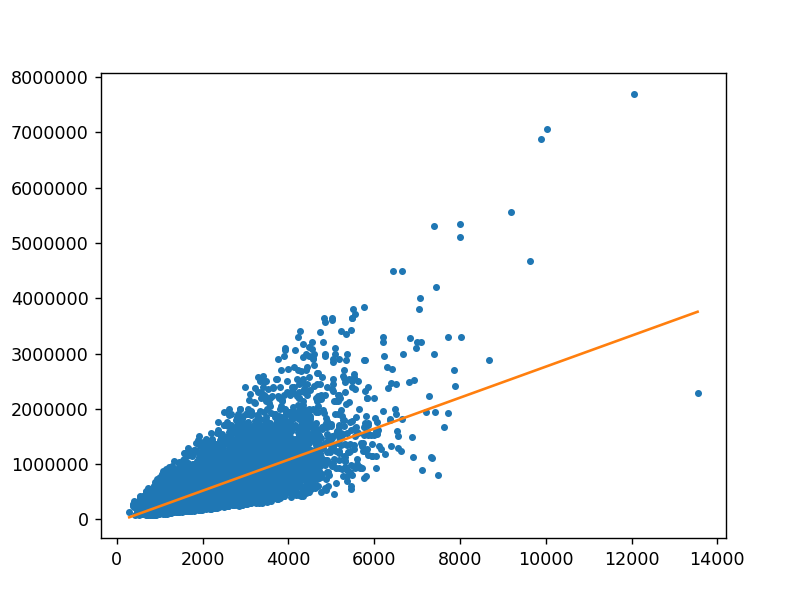

In [14]:
import matplotlib.pyplot as plt
%matplotlib notebook

fig, ax = plt.subplots()
ax.plot(poly1_data['power_1'], poly1_data['price'], '.',
        poly1_data['power_1'], pred1, '-')

## repeat for poly deg 2,3

<IPython.core.display.Javascript object>


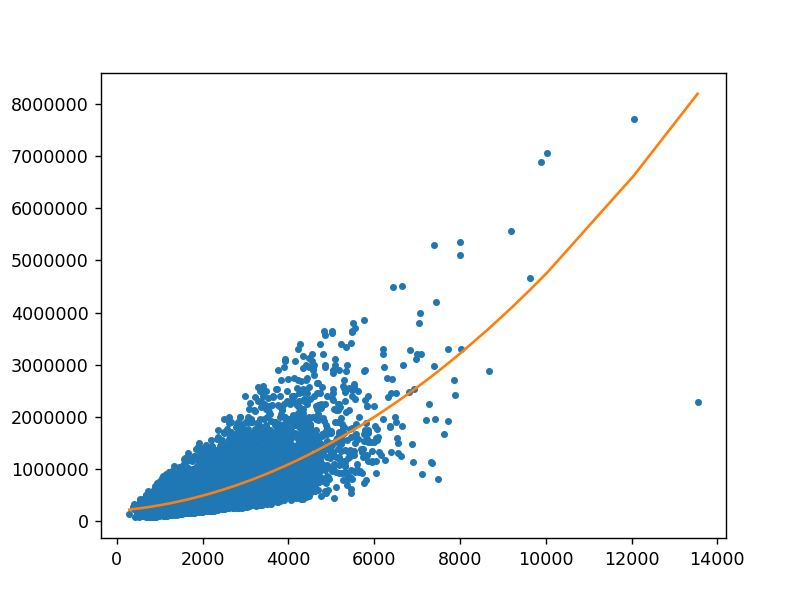

,Name,Value
0,Intercept,199222
1,Power_1,67.9941
2,Power_2,3.858e-02


In [17]:
poly2_data= poly_df(sales['sqft_living'],degree=2)

features=list(poly2_data.columns[1:])
X=poly2_data[features]
y=poly2_data['price']
model2=LinearRegression().fit(X,y)

pred2=model2.predict(X)

fig2, ax2 = plt.subplots()
ax2.plot(poly2_data['power_1'], poly2_data['price'], '.',
        poly2_data['power_1'], pred2, '-')

Coeff2(model2,2)

<IPython.core.display.Javascript object>


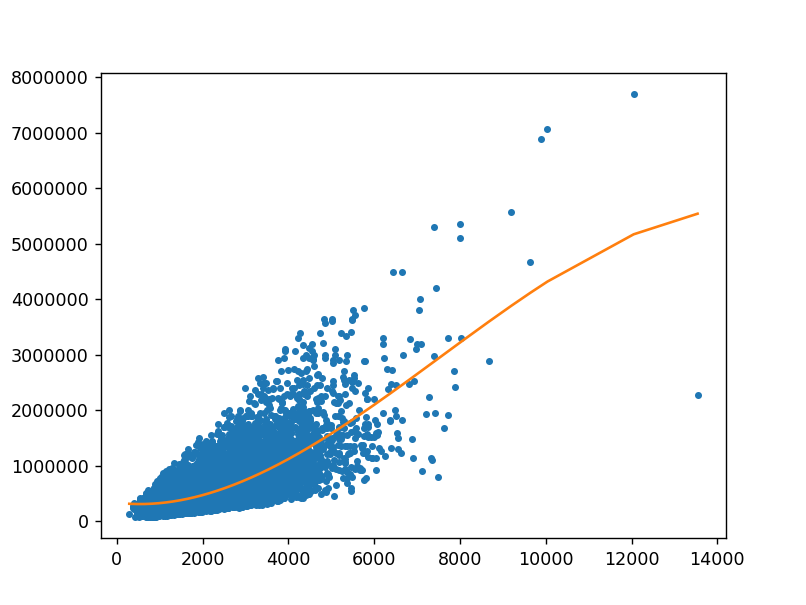

,Name,Value
0,Intercept,336820
1,Power_1,-90.182
2,Power_2,8.705e-02
3,Power_3,-3.841e-06


In [18]:
poly3_data= poly_df(sales['sqft_living'],degree=3)

features=list(poly3_data.columns[1:])
X=poly3_data[features]
y=poly3_data['price']
model3=LinearRegression().fit(X,y)

pred3=model3.predict(X)

fig3, ax3 = plt.subplots()
ax3.plot(poly3_data['power_1'], poly3_data['price'], '.',
        poly3_data['power_1'], pred3, '-')

Coeff2(model3,3)

## try with 15th power

<IPython.core.display.Javascript object>


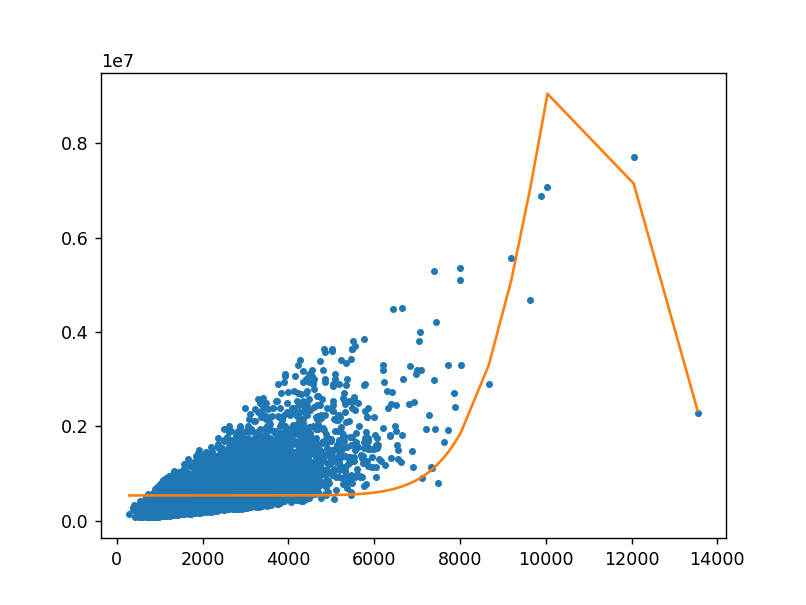

,Name,Value
0,Intercept,537116
1,Power_1,4.56404e-91
2,Power_2,6.917e-51
3,Power_3,-5.847e-56
4,Power_4,0.000e+00
5,Power_5,0.000e+00
6,Power_6,2.686e-71
7,Power_7,2.261e-67
8,Power_8,1.859e-63
9,Power_9,1.471e-59


In [20]:
poly15_data= poly_df(sales['sqft_living'],degree=15)

target=sales['sqft_living']
features=list(poly15_data.columns[1:])
X=poly15_data[features]
y=poly15_data['price']
model15=LinearRegression().fit(X,y)

pred15=model15.predict(X)

fig15, ax15 = plt.subplots()
ax15.plot(poly15_data['power_1'], poly15_data['price'], '.',
        poly15_data['power_1'], pred15, '-')

Coeff2(model15,15)

# estimate 15th deg poly on 4 subsets

## Q2 Do The plotted fitted lines all look the same in all four plots

In [21]:
sub_1=pd.read_csv('wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
sub_2=pd.read_csv('wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
sub_3=pd.read_csv('wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
sub_4=pd.read_csv('wk3_kc_house_set_4_data.csv', dtype=dtype_dict)

In [166]:
def prep_model_and_predict(feature, target, dataset, degree, plot):
    
    '''Usefull fucntion to analyze the 4 subsets.
    Paramaters
    ------------
    feature: str, name of feat. col in df
    target: str, name of target col in df
    dataset: DataFrame, dataset to use
    degree: int, deg of polynomial function
    plot: Boolean, True for plotting
    
    Returns:
    ----------
    poly_df: DF with target as first col and features
    model: trained model on specified Dataset
    coef_df: coeficients table for the features and intercept as firt entry
            '''
    
    # part 1: make a df with relevant format and features 
        # degree >=1
    
    poly_df=pd.DataFrame()
    poly_df[str(target)] = dataset[str(target)]
    poly_df['power_1']   = dataset[str(feature)]
    
        #cehck if degree >1
    if degree > 1:
        for power in range(2, degree+1): #loop over reaming deg
            name = 'power_'+str(power)
            poly_df[name]=poly_df['power_1'].apply(lambda x: x**power)
            
    #part 2: make model and predictions
    
    features=list(poly_df.columns[1:])
    X=poly_df[features]
    y=poly_df[str(target)]
    model=LinearRegression().fit(X,y)
    predictions=model.predict(X)
    
    #part 3: put weights in a nice df
    
    coef_df=pd.DataFrame()
    coef_df=coef_df.append({'Name':'Intercept', 'Value':model.intercept_}, ignore_index=True)
    coef_df=coef_df.append({'Name':'Power_1',   'Value':model.coef_[0]},   ignore_index=True)
    
    if degree > 1:
        for degree in range(2, degree+1):
            name = 'Power_' + str(degree)
            coef_df = coef_df.append({"Name":name, 
                                      'Value':'{:.3e}'.format(model.coef_[degree-1])}, ignore_index=True)
    #prt 4: plot it
    if plot == True:
        
        plt.figure()
        plt.plot(poly_df['power_1'], poly_df[str(target)], '.',
                poly_df['power_1'], predictions, '-')

        plt.xlabel('Square feet, living area')
        plt.ylabel('Price per Sqft')
        plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
        plt.show
    return poly_df, model, coef_df

<IPython.core.display.Javascript object>


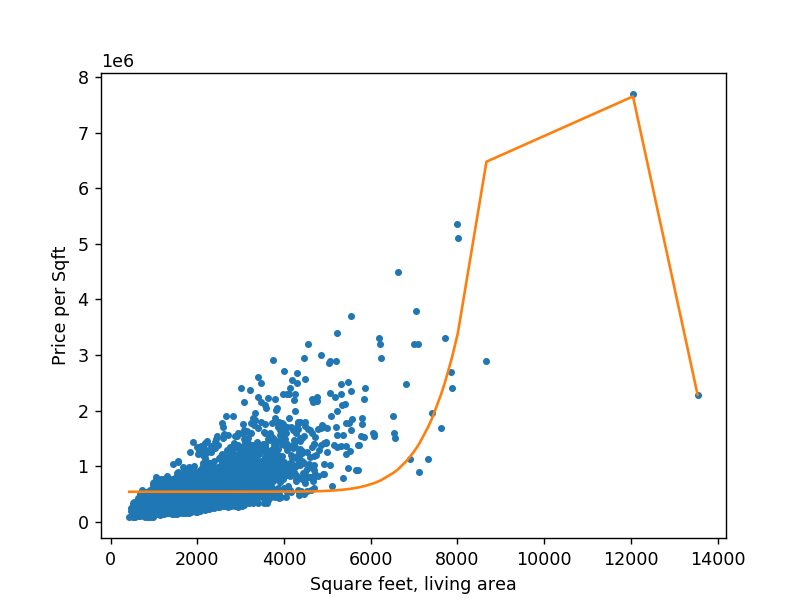

In [167]:
coef_sub_1=prep_model_and_predict('sqft_living','price', sub_1, 15, True)

<IPython.core.display.Javascript object>


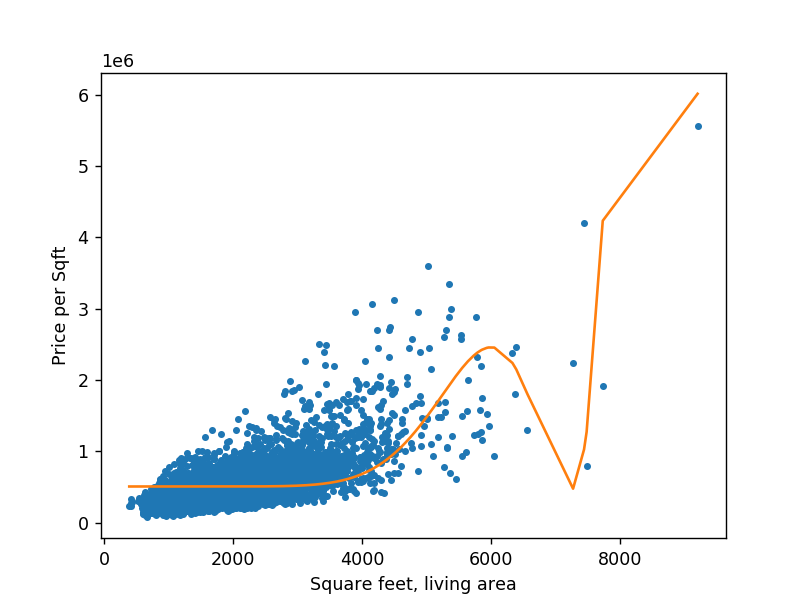

In [168]:
coef_sub_2=prep_model_and_predict('sqft_living','price', sub_2, 15, True)

<IPython.core.display.Javascript object>


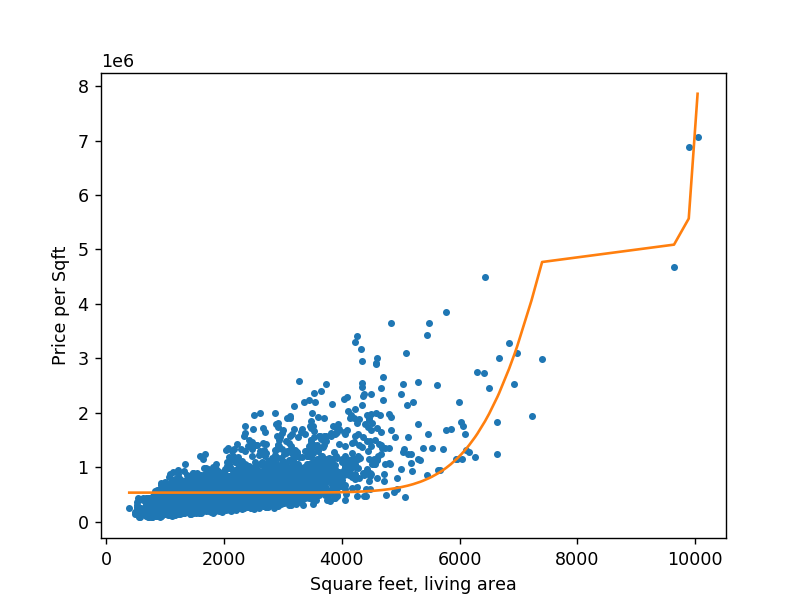

In [169]:
coef_sub_3=prep_model_and_predict('sqft_living','price', sub_3, 15, True)

<IPython.core.display.Javascript object>


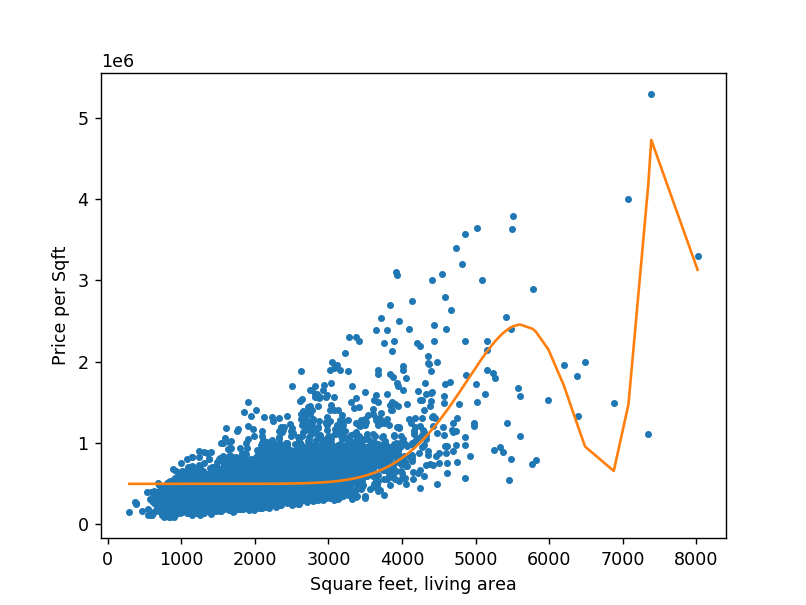

In [170]:
coef_sub_4=prep_model_and_predict('sqft_living','price', sub_4, 15, True)

## Q1 Is the sign (positive or negative) for power_15 the same in all four models?

In [133]:
power15_dict={'sub_1':{coef_sub_1.values[0,0]:coef_sub_1.values[0,1],
                      coef_sub_1.values[15,0]:(coef_sub_1.values[15,1])},
             'sub_2':{coef_sub_2.values[0,0]:coef_sub_2.values[0,1],
                      coef_sub_2.values[15,0]:coef_sub_2.values[15,1]},
             'sub_3':{coef_sub_3.values[0,0]:coef_sub_3.values[0,1],
                      coef_sub_3.values[15,0]:coef_sub_3.values[15,1]},
             'sub_4':{coef_sub_4.values[0,0]:coef_sub_4.values[0,1],
                      coef_sub_4.values[15,0]:coef_sub_4.values[15,1]}}

In [134]:
power15_df=pd.DataFrame(power15_dict)

In [135]:
power15_df

,sub_1,sub_2,sub_3,sub_4
Intercept,539059,506738,530874,494817
Power_15,2.186e-52,-1.972e-49,3.431e-51,-6.092e-49


# use cross validation to find best degree

In [139]:
test_data=pd.read_csv('wk3_kc_house_test_data.csv', dtype= dtype_dict)
train_data=pd.read_csv('wk3_kc_house_train_data.csv', dtype= dtype_dict)
validation_data=pd.read_csv('wk3_kc_house_valid_data.csv', dtype= dtype_dict)

## Q3 Which degree (1, 2, …, 15) had the lowest RSS on Validation data?

In [171]:
rss_table=[]
for degree in range(1,16):
    #use func to train model on train data and extract model
    model_train=prep_model_and_predict('sqft_living','price',train_data, degree, False)[1]
    
    # make validation df ready(from func) and predict values on it
    valid_poly_df=prep_model_and_predict('sqft_living','price',validation_data, degree, False)[0]
    features=list(valid_poly_df.columns[1:])
    X=valid_poly_df[features]
    predi_validation=model_train.predict(X)
    
    #calculate residuals and rss
    residuals=valid_poly_df['price'] - predi_validation
    rss=sum(residuals**2)
    rss_table.append(rss)
    
print('best degree to use is: {} and its RSS is: {:.3e}'.format(rss_table.index(min(rss_table))+1, min(rss_table)))

    

best degree to use is: 6 and its RSS is: 5.663e+14


## Q4 What is the RSS on TEST data for the model with the degree selected from Validation data? (Make sure you got the correct degree from the previous question)

In [173]:
#use func to train model on train data and extract model
model_train=prep_model_and_predict('sqft_living','price',train_data, 6, False)[1]
    
# make test df ready(from func) and predict values on it
test_poly_df=prep_model_and_predict('sqft_living','price',test_data, 6, False)[0]
features=list(test_poly_df.columns[1:])
X=test_poly_df[features]
predi_test=model_train.predict(X)
    
#calculate residuals and rss
residuals=test_poly_df['price'] - predi_test
rss=sum(residuals**2)
print('The RSS on Test data is: {:.2e}'.format(rss))


The RSS on Test data is: 1.35e+14
